<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df = pd.read_csv('malaria.csv')
df

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df1 = df.isna().all(axis = 'columns')
df1.index[df1 == True].tolist()

[4, 21, 39, 99]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# Method 1
(df.isnull().sum()/len(df)) * 100 > 60
df.columns[(df.isnull().sum()/len(df)) * 100 > 60]

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [5]:
# Method 2
df2 = (df.isnull().sum()/len(df)) * 100 > 60
df2.index[df2 == True].tolist()

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

In [6]:
# Method 3
df3 = df.isnull().sum()
df3
list(df3.index[df3 > 0.6 * len(df)])

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df_g = df[['Cases_Guinea', 'Deaths_Guinea']]
df_l = df[['Cases_Liberia', 'Deaths_Liberia']]
df_s = df[['Cases_SierraLeone', 'Deaths_SierraLeone']]
df_n = df[['Cases_Nigeria', 'Deaths_Nigeria']]
df_g.isnull().sum()
print('Guinea: ', df_g.isnull().sum().sum())
print('Liberia: ', df_l.isnull().sum().sum())
print('SierraLeone: ', df_s.isnull().sum().sum())
print('Nigeria: ', df_n.isnull().sum().sum())

Guinea:  69
Liberia:  90
SierraLeone:  80
Nigeria:  178


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

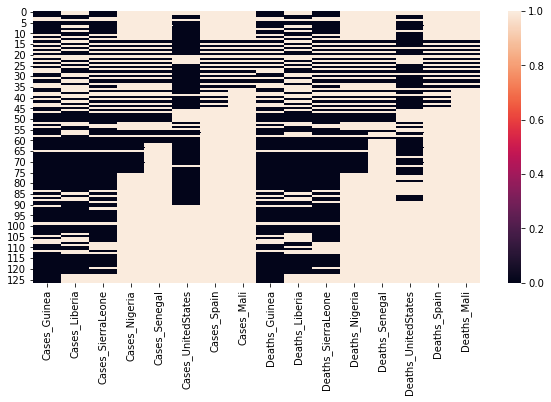

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.shape

(127, 16)

In [10]:
df_new = df.dropna(thresh = 3)

# Thresh --> Least number of observations required to retain a record

In [11]:
df_new.shape

(110, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df3 = df.isnull().sum()
df3
df_col_drop = list(df3.index[df3 > 0.6 * len(df)])
df_col_drop

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

In [13]:
df_new.drop(df_col_drop, axis = 1, inplace = True)

C:\Users\prana\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df_new.shape

(110, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df_new.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_UnitedStates', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_UnitedStates'],
      dtype='object')

In [16]:
df_new['Cases_Liberia'].isnull().sum()

31

In [19]:
df_new['Cases_Liberia'] = df_new['Cases_Liberia'].fillna(df_new['Cases_Liberia'].median())

<ipython-input-19-b065ce050f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cases_Liberia'] = df_new['Cases_Liberia'].fillna(df_new['Cases_Liberia'].median())


In [17]:
df_new['Cases_Liberia'].median()

468.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df_new['Cases_UnitedStates'].isnull().sum()

38

In [21]:
df_new['Cases_UnitedStates'] = df_new['Cases_UnitedStates'].fillna(df_new['Cases_UnitedStates'].mean())

<ipython-input-21-a35c30de506e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cases_UnitedStates'] = df_new['Cases_UnitedStates'].fillna(df_new['Cases_UnitedStates'].mean())


In [22]:
df_new['Cases_UnitedStates'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df_new.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_UnitedStates', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_UnitedStates'],
      dtype='object')

Null values present : Cases_Guinea     23
Deaths_Guinea    24
dtype: int64


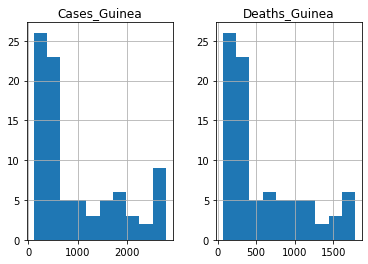

In [25]:
df_g = df_new[['Cases_Guinea','Deaths_Guinea']]

print('Null values present :', df_g.isnull().sum())

df_g.hist()
plt.show()

In [24]:
df_new['Cases_Liberia'] = df_new['Cases_Liberia'].fillna(df_new['Cases_Liberia'].median())

<ipython-input-24-b065ce050f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cases_Liberia'] = df_new['Cases_Liberia'].fillna(df_new['Cases_Liberia'].median())


In [25]:
df_new['Cases_Guinea'] = df_new['Cases_Guinea'].fillna(df_new['Cases_Guinea'].median())
df_new['Deaths_Guinea'] = df_new['Deaths_Guinea'].fillna(df_new['Deaths_Guinea'].median())


<ipython-input-25-31ed12f2f35c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cases_Guinea'] = df_new['Cases_Guinea'].fillna(df_new['Cases_Guinea'].median())
<ipython-input-25-31ed12f2f35c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Deaths_Guinea'] = df_new['Deaths_Guinea'].fillna(df_new['Deaths_Guinea'].median())


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [26]:
df_h = pd.read_csv('house.csv')
df_h.head(5)

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 1080x1080 with 0 Axes>

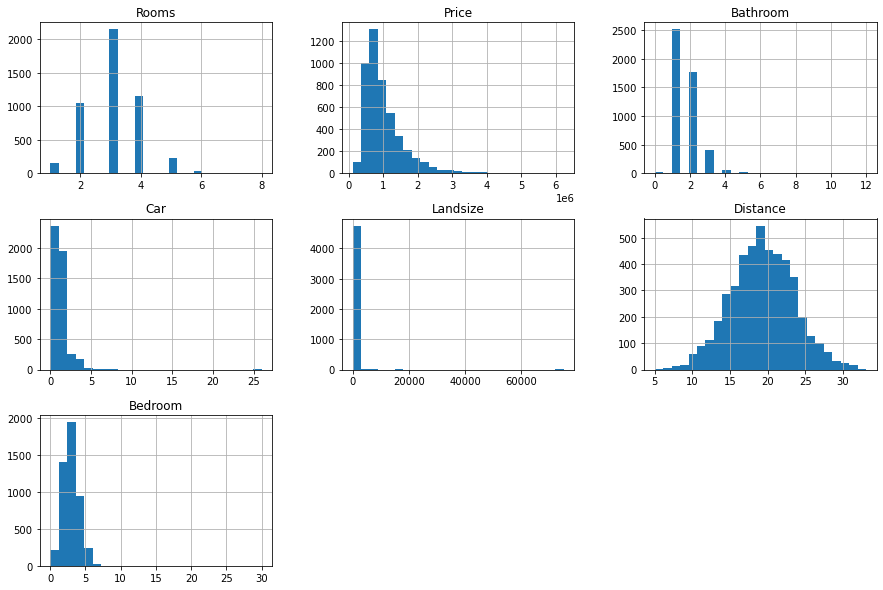

In [27]:
plt.figure(figsize=(15,15))

df_h.hist(bins = 25, figsize = (15,10))
plt.show()

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

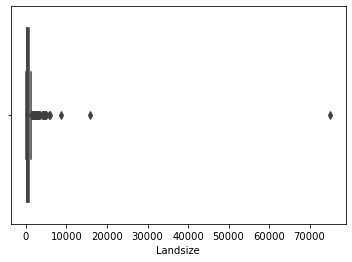

In [28]:
sns.boxplot(df_h['Landsize'])

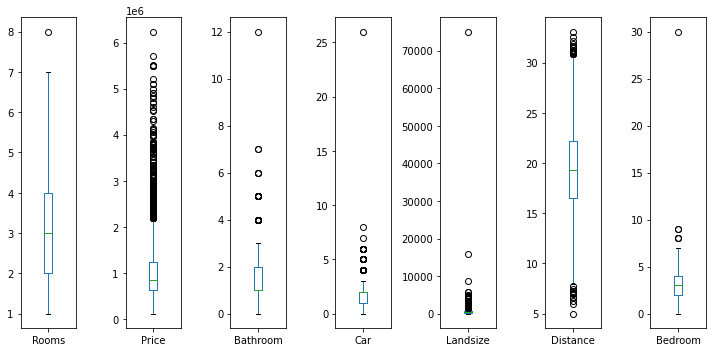

In [29]:
df_h.plot(kind = 'box', subplots = True, figsize = (10,5))

plt.tight_layout()

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

{'whiskers': [<matplotlib.lines.Line2D at 0x28254001430>,
 'caps': [<matplotlib.lines.Line2D at 0x28254008c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x28254001250>],
 'medians': [<matplotlib.lines.Line2D at 0x28254008580>],
 'fliers': [<matplotlib.lines.Line2D at 0x28254008c40>],
 'means': []}

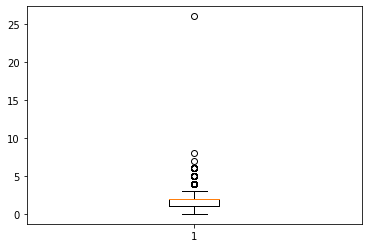

In [30]:
plt.boxplot(df_h['Car'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df_h['Type'].value_counts()

h    3353
u     920
t     493
Name: Type, dtype: int64

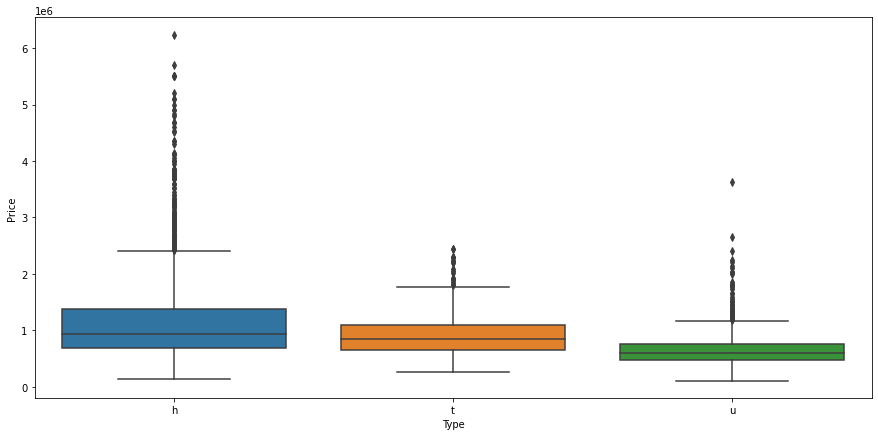

In [32]:
plt.figure(figsize= (15,7))

sns.boxplot(x = df_h['Type'], y = df_h['Price'])

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
outliers = []
def outlier_(data):
    mean= np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
o_r = outlier_(df_h['Rooms'])
str(o_r)


'[7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 8, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6]'

In [34]:
from scipy.stats import zscore
df_h['zscore']=zscore(df_h['Rooms'])
df_h['Rooms'][(df_h['zscore']<-3)|(df_h['zscore']>3)].unique()


array([7, 6, 8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
pd.Series(outlier_(df_h['Rooms'])).unique()


array([7, 6, 8], dtype=int64)

In [37]:
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
q1 = df_h['Bedroom'].quantile(0.25)
q3 = df_h['Bedroom'].quantile(0.75)

IQR = q3 - q1

df_h[df_h['Bedroom'] > q3 + 1.5*IQR]['Bedroom']
df_h[df_h['Bedroom'] > q3 + 3*IQR]['Bedroom']


1937    30
Name: Bedroom, dtype: int64

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
df_h['Distance'].mean()

19.32834662190515

In [40]:
q1 = df_h['Distance'].quantile(0.25)

In [41]:
q3 = df_h['Distance'].quantile(0.75)

In [42]:
IQR = q3 - q1

In [43]:
df_h_new = df_h[~((df_h['Distance'] < q1 - 1.5*IQR) | (df_h['Distance'] > q3 + 1.5*IQR))]

In [44]:
df_h_new['Distance'].mean()

19.311425554382247

In [45]:
df_h.shape

(4766, 11)

In [46]:
df_h_new.shape

(4735, 11)

In [47]:
df_h_new['Distance'].mean()

19.311425554382247

After removing the outliers there is no significant difference in the average.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

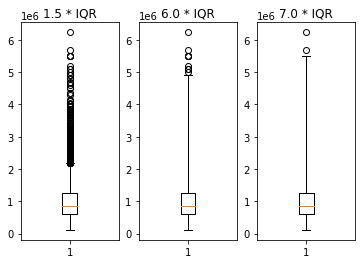

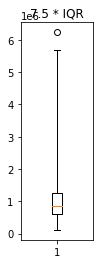

In [48]:
plt.subplot(1,3,1)
plt.boxplot(df_h['Price'], whis = 1.5)
plt.title('1.5 * IQR')
plt.subplot(1,3,2)
plt.boxplot(df_h['Price'], whis = 6.0)
plt.title('6.0 * IQR')
plt.subplot(1,3,3)
plt.boxplot(df_h['Price'], whis = 7.0)
plt.title('7.0 * IQR')
plt.show()
plt.subplot(1,4,4)
plt.boxplot(df_h['Price'], whis = 7.5)
plt.title('7.5 * IQR')
plt.show()

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='distance_cat', ylabel='Price'>

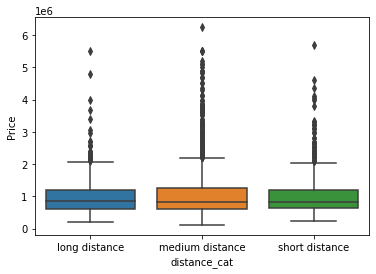

In [49]:
dist = df_h['Distance']
def n_f(dist):
    if (dist>=5.0) & (dist<15.0):
        return 'short distance'

    if (dist>=15.0) & (dist<25.0):
        return 'medium distance'
    
    if (dist>25.0):
        return 'long distance'

df_h['distance_cat'] = df_h['Distance'].apply(n_f)

df_h['distance_cat'].value_counts()

sns.boxplot(x = df_h['distance_cat'], y = df_h['Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='distance_cat', ylabel='Price'>

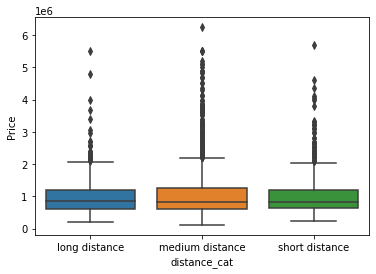

In [50]:
sns.boxplot(x=df_h['distance_cat'], y = df_h['Price'])

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
pr_train, pr_test = train_test_split(df_h['Price'], test_size = 0.20, random_state = 0)

In [53]:
pr_train.shape

(3812,)

In [54]:
pr_test.shape

(954,)